In [ ]:
#Support Vector Machine (SVM) example using iris dataset
data(iris)
head(iris) # inspecting the first six rows of the dataset
str(iris) # structure of the dataset
library(ggplot2)
library(e1071)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [ ]:
install.packages("e1071")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’




Warning message:
“`qplot()` was deprecated in ggplot2 3.4.0.”


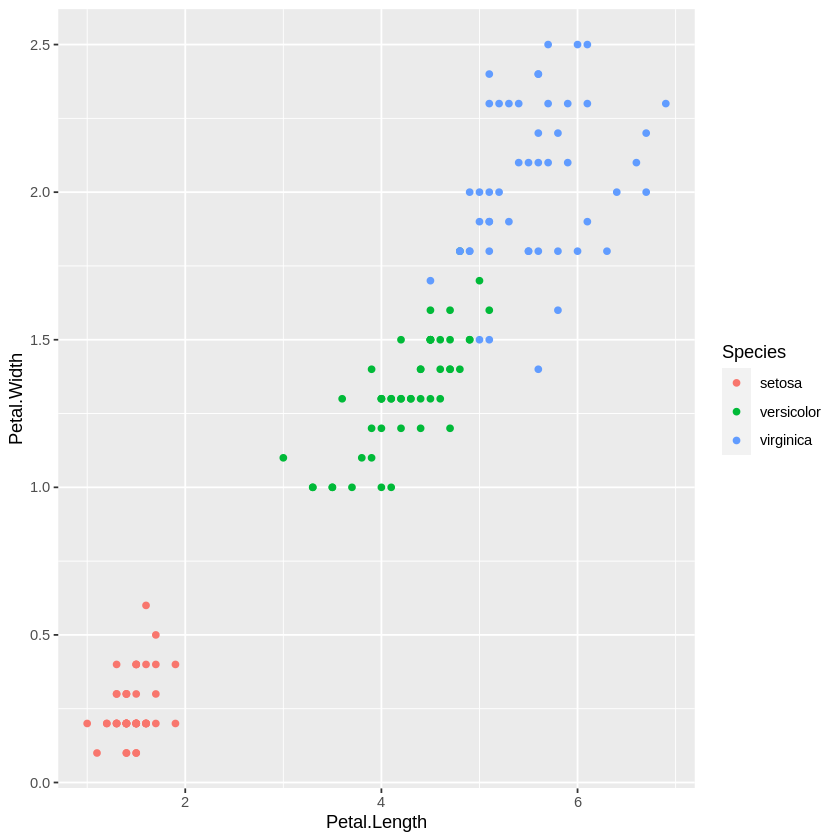

In [ ]:
# we will seperate the Species based on the color and plot with Petal.Legth Vs Petal. Width
# We can clearly see the seperation of Setosa however, there is an overlappings in Versicolor and Virginica.
# Now we plot using the aplot() fuction, X= Petal. Length, Y= Petal. Width using the color seperation respect to # Species.
qplot(Petal.Length, Petal.Width, data=iris, color = Species)


In [ ]:
# Now we can use the built in svm() function that comes in the e1071 library # here we will name our first svm model as #svm_model1
# read the svm() documentation on RStudio by using the help(svm) function help ("svm")
svm_model1 <- svm(Species~., data = iris )


In [ ]:
summary(svm_model1)


Call:
svm(formula = Species ~ ., data = iris)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  51

 ( 8 22 21 )


Number of Classes:  3 

Levels: 
 setosa versicolor virginica




In [ ]:
# Prediction using the model (svm_model1) we created on the iris dataset.
pred1 <- predict(svm_model1, iris)
# creating a table using the predicted one and the actual iris dataset
table1 <- table(Predicted = pred1, Actual = iris$Species)
table1


            Actual
Predicted    setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         48         2
  virginica       0          2        48

In [ ]:
#We can calculate the modell accuracy
Model1_accuracyRate =sum(diag(table1) )/sum(table1)
Model1_accuracyRate
# We can calcuate the missclassification rate
Model1_MissClassificationRate = 1 - Model1_accuracyRate
Model1_MissClassificationRate


[1] 0.9733333

[1] 0.02666667

In [ ]:
# Now we can use the built in svm() function that comes in the e1071 library # here we will name our first svm model as #svm_model1
# read the svm() documentation on RStudio by using the help(svm) function help ("svm")
svm_model1 <- svm(Species~., data = iris,kernel = "polynomial" )


In [ ]:
summary(svm_model1)


Call:
svm(formula = Species ~ ., data = iris, kernel = "polynomial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  3 
     coef.0:  0 

Number of Support Vectors:  54

 ( 6 26 22 )


Number of Classes:  3 

Levels: 
 setosa versicolor virginica




In [ ]:
# Prediction using the model (svm_model1) we created on the iris dataset.
pred1 <- predict(svm_model1, iris)
# creating a table using the predicted one and the actual iris dataset
table1 <- table(Predicted = pred1, Actual = iris$Species)
table1

            Actual
Predicted    setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         50         7
  virginica       0          0        43

In [ ]:
#We can calculate the modell accuracy
Model1_accuracyRate =sum(diag(table1) )/sum(table1)
Model1_accuracyRate
# We can calcuate the missclassification rate
Model1_MissClassificationRate = 1 - Model1_accuracyRate
Model1_MissClassificationRate


[1] 0.9533333

[1] 0.04666667

In [ ]:
#######I noticed decrease in accuracy after the kernel was set to polynomial.

In [ ]:
install.packages("tree")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Fitting a Regression Trees
library(MASS)
library(tree)
set.seed (1)
head (Boston)
train =sample(1:nrow(Boston), nrow(Boston)/2)
tree.boston = tree (medv~.,Boston, subset = train )
summary (tree.boston)
# Note that the output summary O indicates that only three of the variables have been
# used to constructing the tree. In the context of a regression tree,
# the deviance is simly the sum of squared errors for the tree.
# Regression Tree
tree ( formula = medv ~., data = Boston, subset = train )


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7



Regression tree:
tree(formula = medv ~ ., data = Boston, subset = train)
Variables actually used in tree construction:
[1] "rm"    "lstat" "crim"  "age"  
Number of terminal nodes:  7 
Residual mean deviance:  10.38 = 2555 / 246 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-10.1800  -1.7770  -0.1775   0.0000   1.9230  16.5800 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 253 19450.0 21.79  
   2) rm < 6.9595 222  6794.0 19.35  
     4) lstat < 14.405 135  1816.0 22.51  
       8) rm < 6.543 111   763.1 21.38 *
       9) rm > 6.543 24   256.5 27.73 *
     5) lstat > 14.405 87  1554.0 14.46  
      10) crim < 11.4863 61   613.8 16.23  
        20) age < 93.95 30   245.7 18.09 *
        21) age > 93.95 31   164.1 14.43 *
      11) crim > 11.4863 26   302.7 10.32 *
   3) rm > 6.9595 31  1929.0 39.21  
     6) rm < 7.553 16   505.5 33.42 *
     7) rm > 7.553 15   317.0 45.38 *

node), split, n, deviance, yval
      * denotes terminal node

 1) root 253 19450.0 21.79  
   2) rm < 6.9595 222  6794.0 19.35  
     4) lstat < 14.405 135  1816.0 22.51  
       8) rm < 6.543 111   763.1 21.38 *
       9) rm > 6.543 24   256.5 27.73 *
     5) lstat > 14.405 87  1554.0 14.46  
      10) crim < 11.4863 61   613.8 16.23  
        20) age < 93.95 30   245.7 18.09 *
        21) age > 93.95 31   164.1 14.43 *
      11) crim > 11.4863 26   302.7 10.32 *
   3) rm > 6.9595 31  1929.0 39.21  
     6) rm < 7.553 16   505.5 33.42 *
     7) rm > 7.553 15   317.0 45.38 *

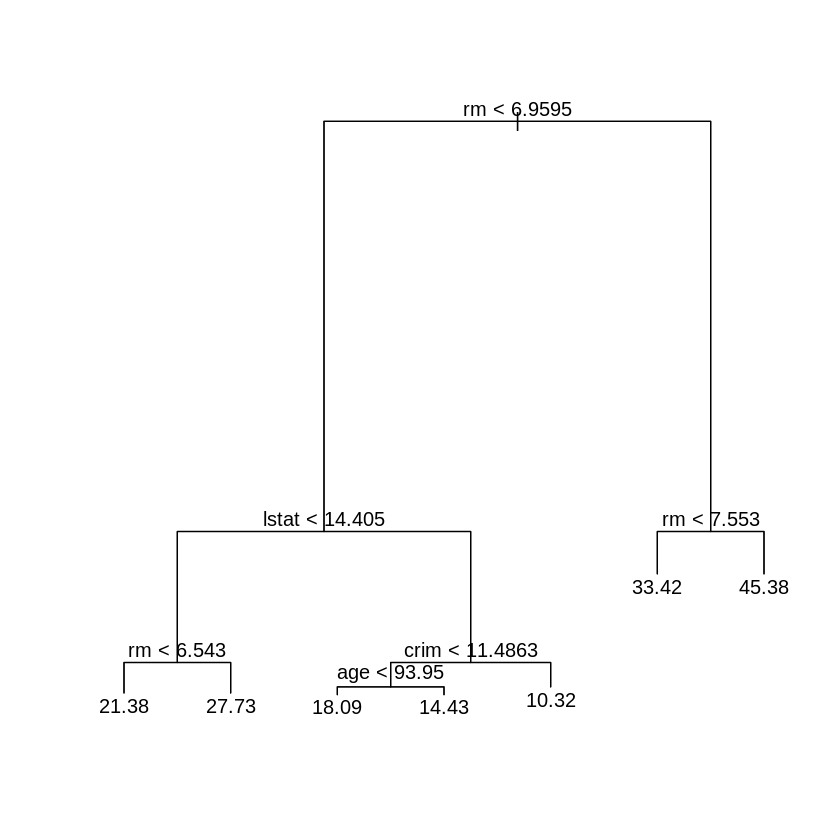

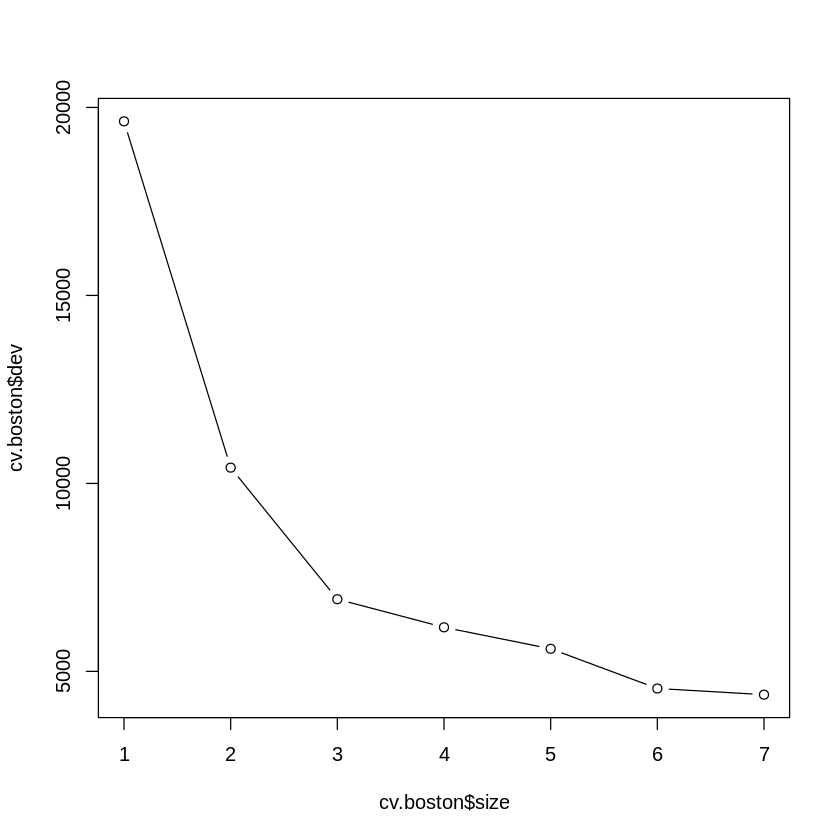

In [ ]:
# Regression Tree
tree (formula = medv ~., , data = Boston, subset = train)
# We now plot the tree
plot(tree.boston)
text(tree.boston, pretty =0 )
# The variable "Istat" measure the percentage of the individuals with lower socioeconimics status
# The tree indicates that the lower values of lstat corresponds to more expensive houese.
# Now we use the cv.tree() function to see whether pruning the tree will
# improve performance.
cv.boston=cv.tree(tree.boston)
plot (cv.boston$size, cv.boston$dev, typ ='b')


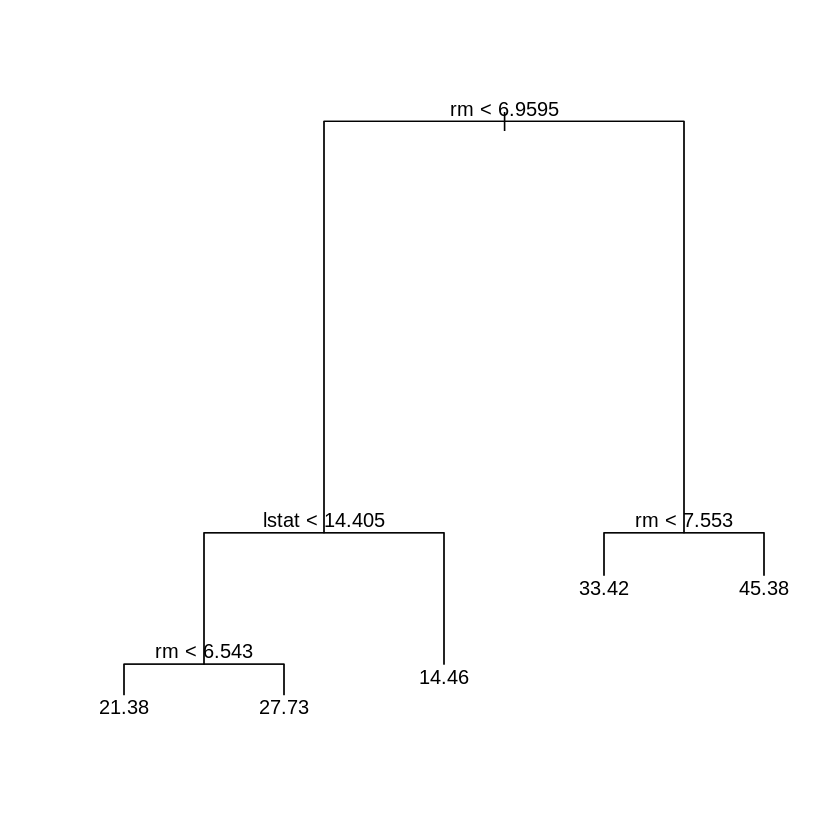

In [ ]:
#In this case, the most complex tree is selected by cross-validation. # How- ever, if we wish to prune the tree, we could do so as follows, #using the prune.tree() function
prune.boston=prune.tree (tree.boston , best =5 )
plot (prune.boston)
text (prune.boston , pretty=0 )


[1] 35.28688

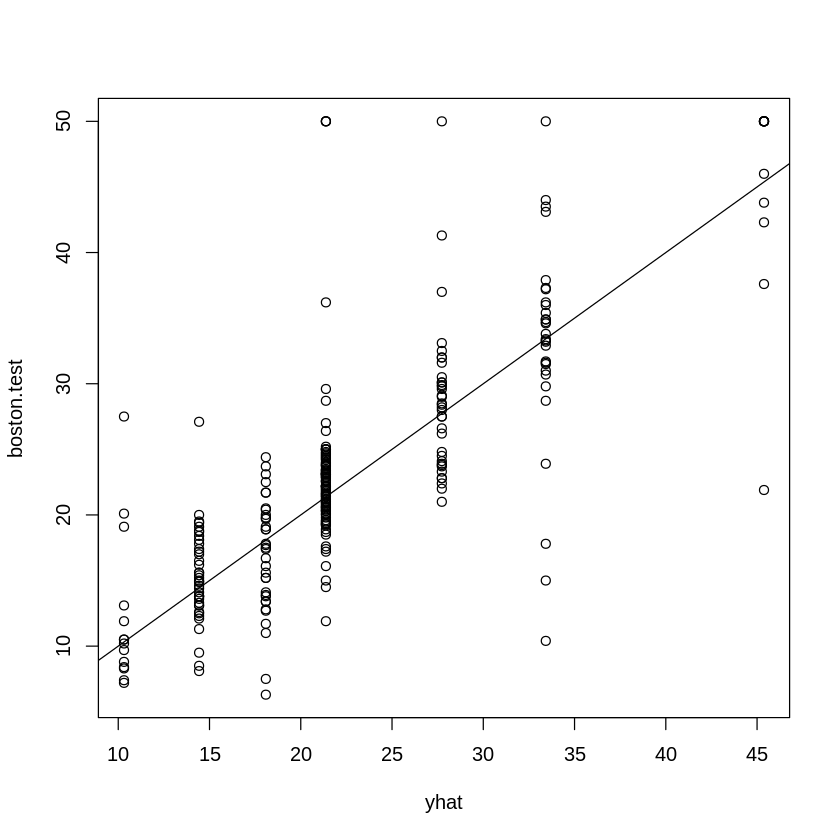

In [ ]:

yhat=predict(tree.boston , newdata=Boston [-train , ])
boston.test=Boston [-train , "medv"]
plot (yhat, boston.test)

abline (0,1)
mean ((yhat-boston.test)^2)
	#In other words, the test set MSE associated with the regression tree is 25.05 .
# The square root of the MSE is therefore around 5.005,
# indicating that this model leads to test predictions that
# are within around $5,005 of the true median home value for the suburb.


In [ ]:
install.packages("randomForest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(randomForest)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin





Call:
 randomForest(formula = medv ~ ., data = Boston, mtry = 13, importance = TRUE,      subset = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 13

          Mean of squared residuals: 11.39601
                    % Var explained: 85.17

[1] 23.59273

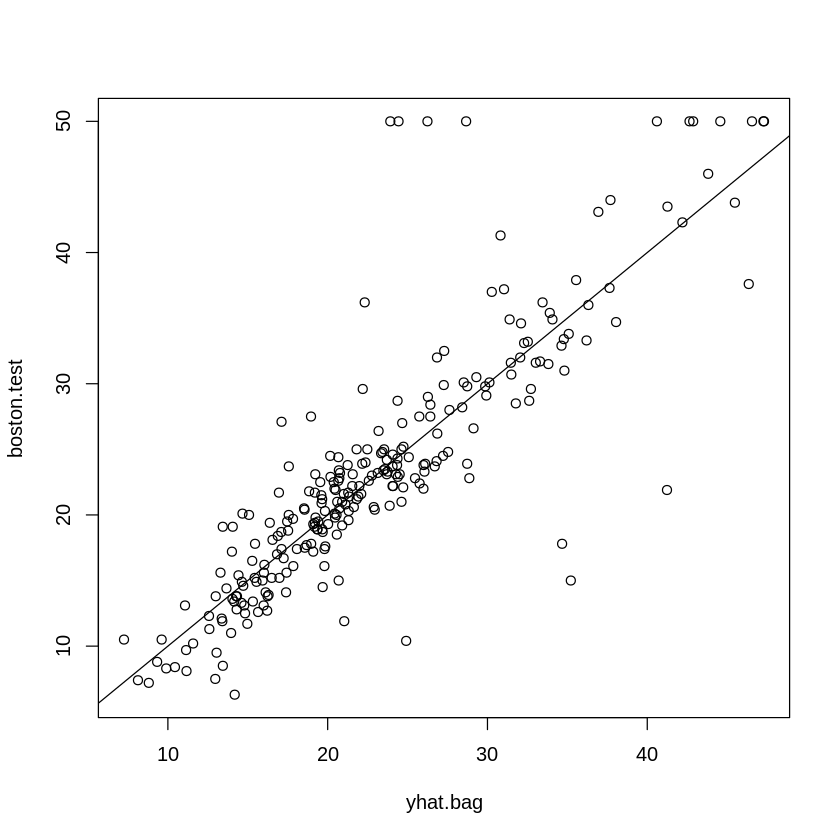

In [ ]:
# Bagging and Random Forest Example

set.seed(1)
bag.boston = randomForest(medv ~., data=Boston, subset = train, mtry=13, importance=TRUE)
bag.boston
# The argument mtry=13 indicates that all 13 predictors should be considered
# for each split of the tree-in other words, that bagging should be done.
# How well does this bagged model perform on the test set?
yhat.bag = predict (bag.boston , newdata=Boston[-train , ])
plot(yhat.bag, boston.test)
# adding the abline()
abline (0,1)
mean ((yhat.bag-boston.test)^2)


In [ ]:

bag.boston=randomForest (medv~. , data = Boston, subset=train, mtry=13, ntree =25 )
yhat.bag = predict (bag.boston , newdata = Boston [-train ,])
mean ((yhat.bag-boston.test)^2)


[1] 23.66716

In [ ]:
set.seed(1)
rf.boston=randomForest (medv~. , data=Boston, subset=train,
mtry =6, importance = TRUE)
yhat.rf= predict (rf.boston , newdata=Boston[-train , ])
mean ((yhat.rf-boston.test) ^2)


[1] 19.62021

,%IncMSE,IncNodePurity
crim,16.697017,1076.08786
zn,3.625784,88.35342
indus,4.968621,609.53356
chas,1.061432,52.21793
nox,13.518179,709.87339
rm,32.343305,7857.65451
age,13.272498,612.21424
dis,9.032477,714.94674
rad,2.878434,95.80598
tax,9.118801,364.92479


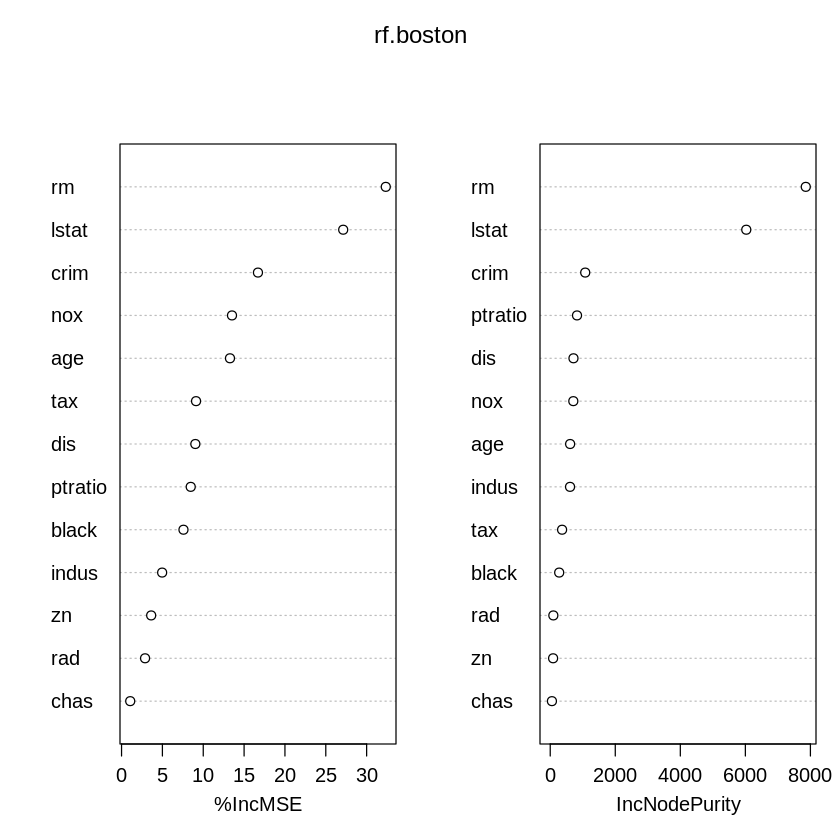

In [ ]:
importance(rf.boston)
# Two measures of variable importance are reported.
#The former is based upon the mean decrease of accuracy in predictions on # the out of bag samples when a given variable is excluded from the model.
#The latter is a measure of the total decrease in node impurity that results " from splits over that variable, averaged over all trees.
# In the case of regression trees, the node impurity is measured by the training RSS, # and for classification trees by the deviance.
# Plots of these importance measures can be produced using the varImpPlot () function.
varImpPlot (rf.boston)


In [2]:
install.packages("cvTools")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘DEoptimR’, ‘robustbase’




In [3]:
install.packages("robustbase")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library(cvTools)
library(robustbase)
data(coleman)
call <- call("lmrob", formula = Y ~ .)
# set up folds for cross-validation
folds <- cvFolds(nrow(coleman), K = 5, R = 10)
# perform cross-validation
cvTool(call, data = coleman, y = coleman$Y, cost = rtmspe, folds = folds, costArgs = list(trim = 0.1))
#vary K and R
#look at cvfits, use densityplot,
tuning <- list(tuning.psi=seq(2., 6., 20))
cvFitsLmrob <- cvTuning(call, data = coleman, y = coleman$Y, tuning = tuning, cost = rtmspe, folds = folds, costArgs = list(trim = 0.1))
# look at output
cvFitsLmrob
# summarize
aggregate(cvFitsLmrob, summary)


Loading required package: lattice

Loading required package: robustbase



CV
1.2061900
1.0399689
1.0958950
1.0251480
1.3006212
1.2480431
1.0827943
1.1132592
1.0614847
0.8597776


Warning message in lmrob.fit(x, y, control, init = init):
“M-step did NOT converge. Returning unconverged SM-estimate”
Warning message in lmrob.S(x, y, control = control):
“find_scale() did not converge in 'maxit.scale' (= 200) iterations with tol=1e-10, last rel.diff=0”
Warning message in lmrob.fit(x, y, control, init = init):
“M-step did NOT converge. Returning unconverged SM-estimate”
Warning message in lmrob.fit(x, y, control, init = init):
“M-step did NOT converge. Returning unconverged SM-estimate”



5-fold CV results:
  tuning.psi       CV
1          2 1.205474

Optimal tuning parameter:
   tuning.psi
CV          2

ERROR while rich displaying an object: Error in apply(apply(col, 2L, format), 1L, paste, collapse = ", "): dim(X) must have a positive length

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. rep

In [6]:
install.packages("robustbase")
install.packages("cvTools")
library("robustbase")
require(cvTools)
data("coleman")
set.seed(1234) # set seed for reproducibility
## set up folds for cross-validation
folds <- cvFolds(nrow(coleman), K = 5, R = 10)
## compare raw and reweighted LTS estimators for
## 50% and 75% subsets
# 50% subsets
fitLts50 <- ltsReg(Y ~ ., data = coleman, alpha = 0.5)
cvFitLts50 <- cvLts(fitLts50, cost = rtmspe, folds = folds,
fit = "both", trim = 0.1)
# 75% subsets
fitLts75 <- ltsReg(Y ~ ., data = coleman, alpha = 0.75)
cvFitLts75 <- cvLts(fitLts75, cost = rtmspe, folds = folds,
fit = "both", trim = 0.1)
# combine results into one object
cvFitsLts <- cvSelect("0.5" = cvFitLts50, "0.75" = cvFitLts75)
cvFitsLts
# "cv" object
ncv(cvFitLts50)
nfits(cvFitLts50)
cvNames(cvFitLts50)
cvNames(cvFitLts50) <- c("improved", "initial")
fits(cvFitLts50)
cvFitLts50
# "cvSelect" object
ncv(cvFitsLts)
nfits(cvFitsLts)
cvNames(cvFitsLts)
cvNames(cvFitsLts) <- c("improved", "initial")
fits(cvFitsLts)
fits(cvFitsLts) <- 1:2
cvFitsLts


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




5-fold CV results:
   Fit reweighted      raw
1  0.5   1.165749 1.528544
2 0.75   1.011054 1.167683

Best model:
reweighted        raw 
    "0.75"     "0.75" 

[1] 2

NULL

[1] "reweighted" "raw"

NULL

5-fold CV results:
improved  initial 
1.165749 1.528544 

[1] 2

[1] 2

[1] "reweighted" "raw"

[1] 0.5  0.75
Levels: 0.5 0.75


5-fold CV results:
  Fit improved  initial
1   1 1.165749 1.528544
2   2 1.011054 1.167683

Best model:
improved  initial 
       2        2 

In [7]:
# set up folds for cross-validation
folds <- cvFolds(nrow(coleman), K = 5, R = 10)
## compare LS, MM and LTS regression
# perform cross-validation for an LS regression model
fitLm <- lm(Y ~ ., data = coleman)
cvFitLm <- cvLm(fitLm, cost = rtmspe,
folds = folds, trim = 0.1)
# perform cross-validation for an MM regression model
fitLmrob <- lmrob(Y ~ ., data = coleman)
cvFitLmrob <- cvLmrob(fitLmrob, cost = rtmspe,
folds = folds, trim = 0.1)
# perform cross-validation for an LTS regression model
fitLts <- ltsReg(Y ~ ., data = coleman)
cvFitLts <- cvLts(fitLts, cost = rtmspe,
folds = folds, trim = 0.1)
# compare cross-validation results
cvSelect(LS = cvFitLm, MM = cvFitLmrob, LTS = cvFitLts)
## compare raw and reweighted LTS estimators for
## 50% and 75% subsets
# 50% subsets
fitLts50 <- ltsReg(Y ~ ., data = coleman, alpha = 0.5)
cvFitLts50 <- cvLts(fitLts50, cost = rtmspe, folds = folds,
fit = "both", trim = 0.1)
# 75% subsets
fitLts75 <- ltsReg(Y ~ ., data = coleman, alpha = 0.75)
cvFitLts75 <- cvLts(fitLts75, cost = rtmspe, folds = folds,
fit = "both", trim = 0.1)
# combine and plot results
cvSelect("0.5" = cvFitLts50, "0.75" = cvFitLts75)


Warning message in lf.cov(init, x = x):
“.vcov.avar1: negative diag(<vcov>) fixed up; consider 'cov=".vcov.w."' instead”



5-fold CV results:
  Fit       CV
1  LS 1.742408
2  MM 1.201736
3 LTS 1.219383

Best model:
  CV 
"MM" 


5-fold CV results:
   Fit reweighted      raw
1  0.5   1.219383 1.607021
2 0.75   1.038942 1.222661

Best model:
reweighted        raw 
    "0.75"     "0.75" 

In [8]:
set.seed(1234) # set seed for reproducibility
# set up folds for cross-validation
folds <- cvFolds(nrow(coleman), K = 5, R = 10)
# perform cross-validation for an LS regression model
fitLm <- lm(Y ~ ., data = coleman)
repCV(fitLm, cost = rtmspe, folds = folds, trim = 0.1)
# perform cross-validation for an MM regression model
fitLmrob <- lmrob(Y ~ ., data = coleman)
repCV(fitLmrob, cost = rtmspe, folds = folds, trim = 0.1)
# perform cross-validation for an LTS regression model
fitLts <- ltsReg(Y ~ ., data = coleman)
repCV(fitLts, cost = rtmspe, folds = folds, trim = 0.1)
repCV(fitLts, cost = rtmspe, folds = folds,
fit = "both", trim = 0.1)



5-fold CV results:
      CV 
1.775811 

Warning message in lmrob.S(x, y, control = control):
“find_scale() did not converge in 'maxit.scale' (= 200) iterations with tol=1e-10, last rel.diff=0”
Warning message in lmrob.S(x, y, control = control):
“find_scale() did not converge in 'maxit.scale' (= 200) iterations with tol=1e-10, last rel.diff=0”
Warning message in lmrob.S(x, y, control = control):
“find_scale() did not converge in 'maxit.scale' (= 200) iterations with tol=1e-10, last rel.diff=0”


5-fold CV results:
      CV 
1.023272 

5-fold CV results:
      CV 
1.165749 

5-fold CV results:
reweighted        raw 
  1.165749   1.528544 

Call:
smooth.spline(x = speed, y = dist)

Smoothing Parameter  spar= 0.7801305  lambda= 0.1112206 (11 iterations)
Equivalent Degrees of Freedom (Df): 2.635278
Penalized Criterion (RSS): 4187.776
GCV: 244.1044

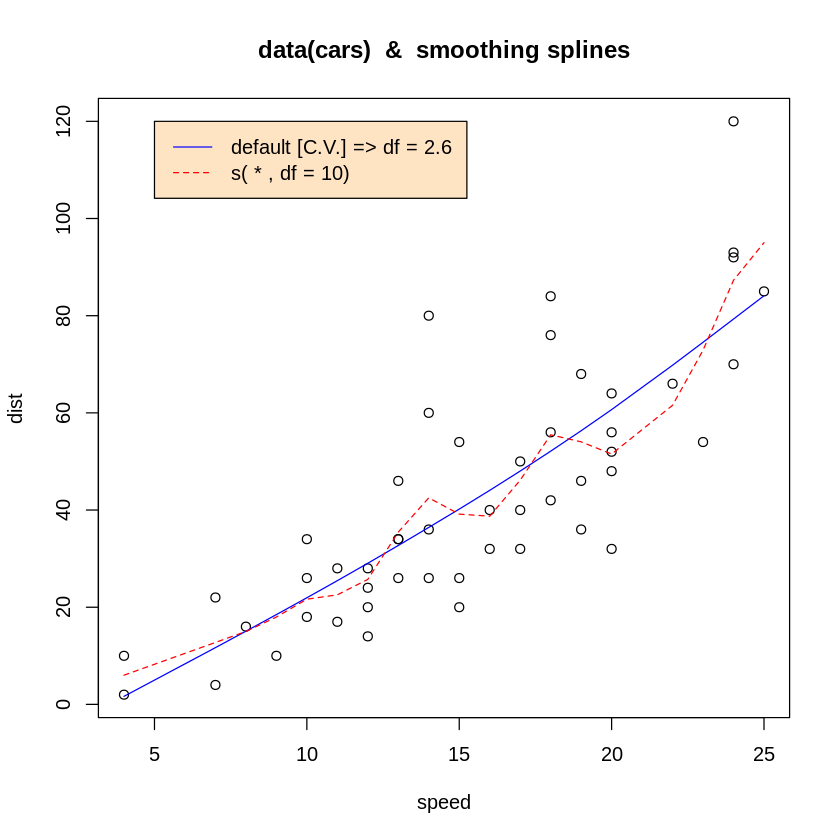

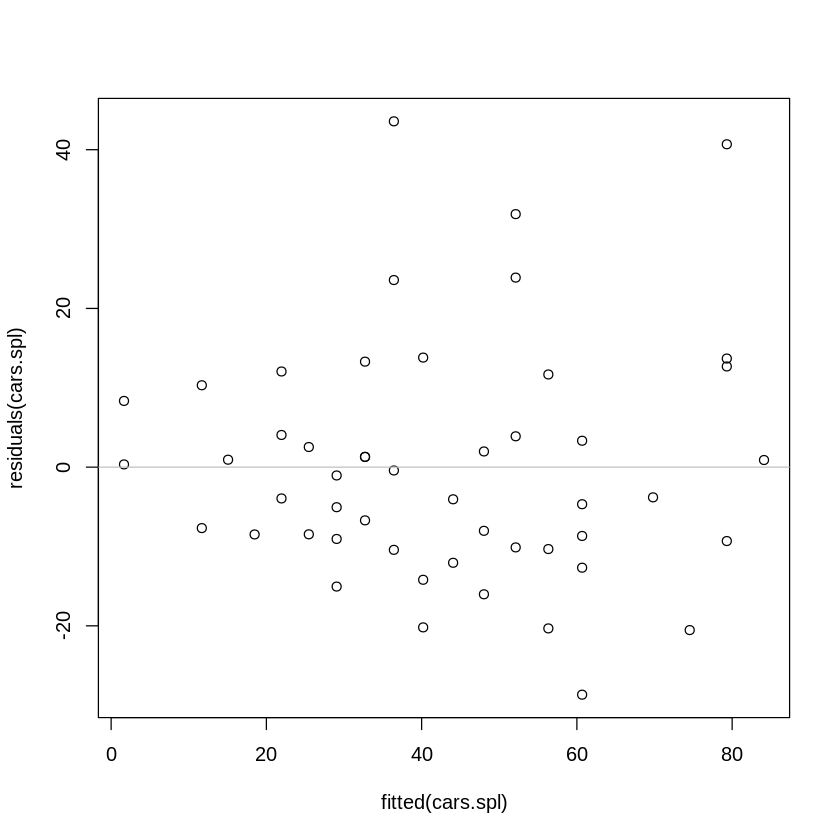

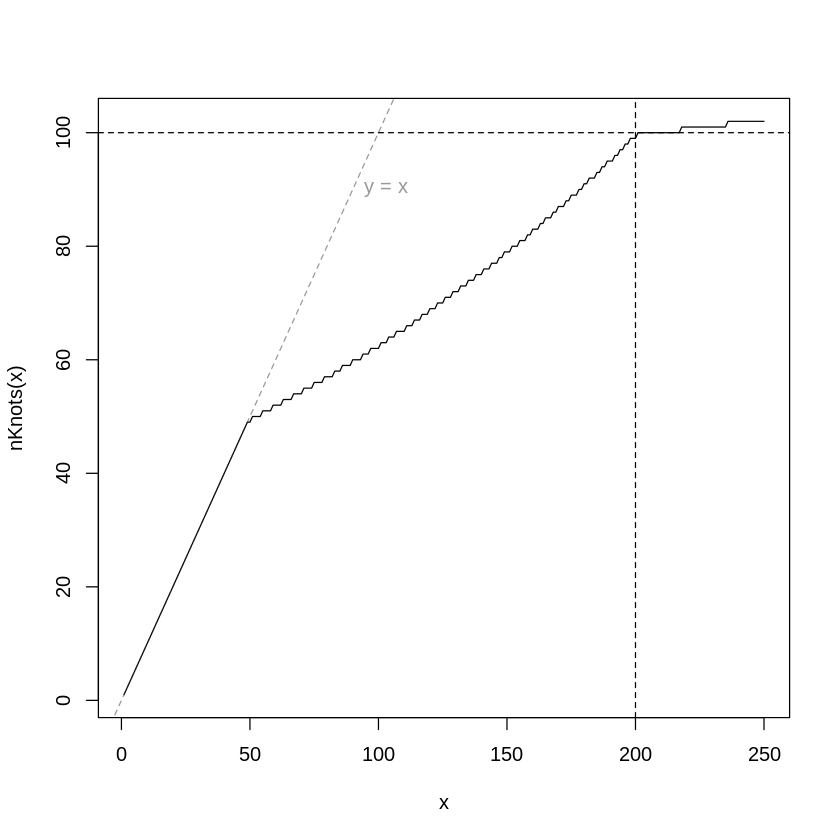

Call:
smooth.spline(x = y18)

Smoothing Parameter  spar= 0.3928105  lambda= 9.672776e-05 (13 iterations)
Equivalent Degrees of Freedom (Df): 8.494168
Penalized Criterion (RSS): 3.59204
GCV: 0.7155391

Call:
smooth.spline(x = y18, spar = 0.2)

Smoothing Parameter  spar= 0.2  lambda= 3.911187e-06
Equivalent Degrees of Freedom (Df): 15.259
Penalized Criterion (RSS): 0.4973656
GCV: 1.191602

Call:
smooth.spline(x = y18, spar = 0.2, cv = NA)

Smoothing Parameter  spar= 0.2  lambda= 3.911187e-06
Equivalent Degrees of Freedom (Df): NA
Penalized Criterion (RSS): 0.4973656

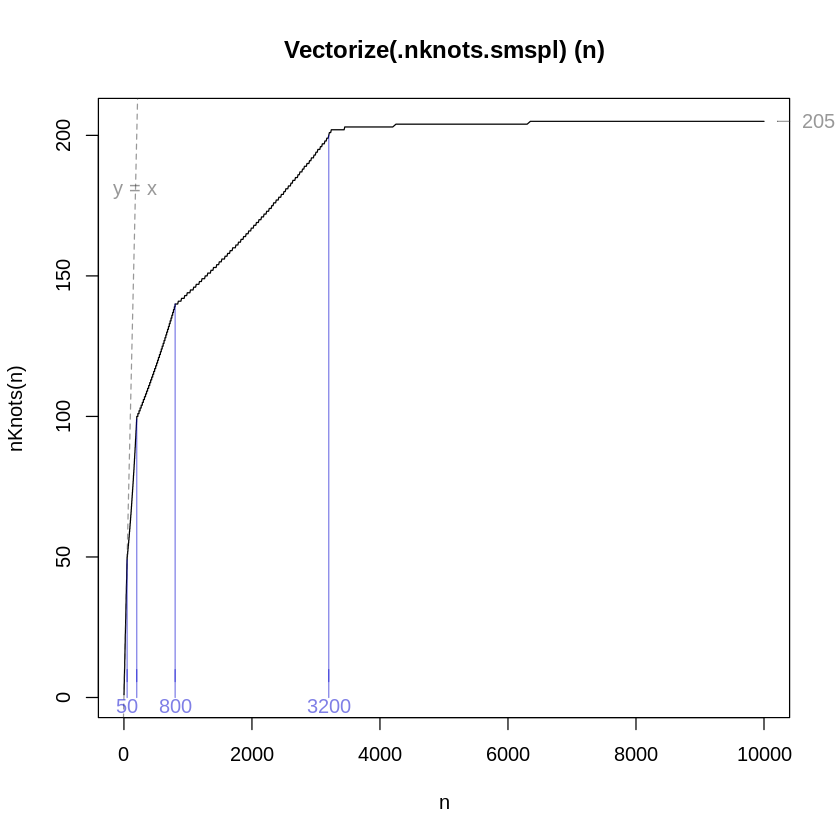

sbart (ratio =   3.5942194e-05) iterations; initial tol1 = 3.404154e-07 :
       spar            GCV      b - a           e  Kind   NEW lspar         crit
 -------------------------------------------------------------------------------
-0.35410197     1.44773374 3.0000e+00           0 GS -- 5.07753e-05     0.747824
 0.35410197    0.747823625 1.8541e+00      1.8541 FP GS   0.0737682      2.83649
 0.35410197    0.747823625 1.1459e+00      1.1459 FP PI 7.20379e-07      1.38165
 0.35410197    0.747823625 6.9350e-01     0.43769 FP GS  0.00081943      1.21231
 0.35410197    0.747823625 4.2299e-01     0.43769 FP PI 3.17624e-05     0.805043
 0.35410197    0.747823625 1.9538e-01     0.16718 FP PI 7.97404e-05     0.718618
 0.38123466    0.718617706 1.6718e-01     -0.0282 FP GS 0.000194162     0.760972
 0.38123466    0.718617706 8.0628e-02     0.14005 FP PI 9.36448e-05     0.715624
 0.39089669    0.715623968 5.3495e-02    0.053495 FP PI 9.77925e-05     0.715551
 0.39350189    0.715550822 4.3833e-

Call:
smooth.spline(x = y18, control.spar = list(trace = TRUE, tol = 1e-06, 
    low = -1.5))

Smoothing Parameter  spar= 0.392796  lambda= 9.665147e-05 (15 iterations)
Equivalent Degrees of Freedom (Df): 8.495582
Penalized Criterion (RSS): 3.59097
GCV: 0.715539

sbart (ratio =   3.5942194e-05) iterations; initial tol1 = 3.404154e-07 :
       spar             CV      b - a           e  Kind   NEW lspar         crit
 -------------------------------------------------------------------------------
-0.35410197     1.11299262 3.0000e+00           0 GS -- 5.07753e-05      0.62488
 0.35410197     0.62487989 1.8541e+00      1.8541 FP GS   0.0737682      2.64119
 0.35410197     0.62487989 1.1459e+00      1.1459 FP PI 4.85377e-07      1.07638
 0.35410197     0.62487989 7.1723e-01     0.43769 FP GS  0.00081943      1.10411
 0.35410197     0.62487989 4.4672e-01     0.43769 FP PI 1.89429e-05     0.725088
 0.35410197     0.62487989 2.2645e-01     0.16718 FP GS 0.000146897      0.62365
 0.41796068    0.623650331 1.6718e-01     0.16718 FP PI 8.73889e-05     0.605295
 0.38674050     0.60529534 6.3859e-02    0.063859 FP PI 8.71107e-05     0.605306
 0.38674050     0.60529534 3.1412e-02    -0.03122 FP PI 8.92353e-05      0.60526
 0.38799735    0.605259688 3.1220e-

Call:
smooth.spline(x = y18, cv = TRUE, control.spar = list(trace = TRUE, 
    tol = 1e-06, low = -1.5))

Smoothing Parameter  spar= 0.3881247  lambda= 8.942401e-05 (15 iterations)
Equivalent Degrees of Freedom (Df): 8.636047
Penalized Criterion (RSS): 3.488101
PRESS(l.o.o. CV): 0.6052594

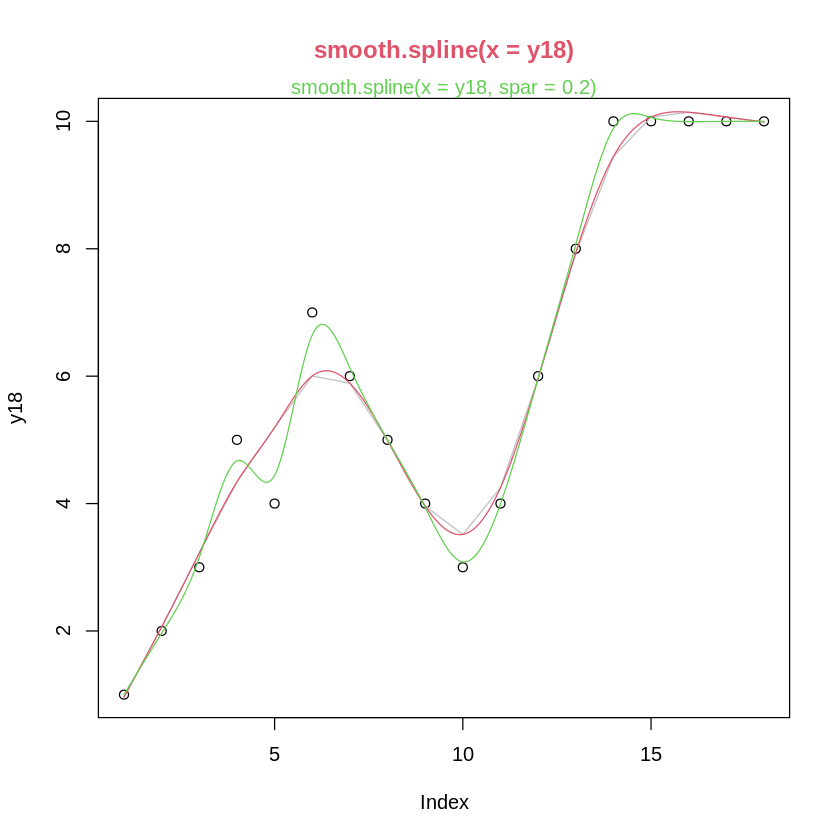

In [9]:
require(graphics)
data(cars)

attach(cars)
plot(speed, dist, main = "data(cars)  &  smoothing splines")
cars.spl <- smooth.spline(speed, dist)
(cars.spl)
## This example has duplicate points, so avoid cv = TRUE

lines(cars.spl, col = "blue")
lines(smooth.spline(speed, dist, df = 10), lty = 2, col = "red")
legend(5,120,c(paste("default [C.V.] => df =",round(cars.spl$df,1)),
               "s( * , df = 10)"), col = c("blue","red"), lty = 1:2,
       bg = 'bisque')
detach()


## Residual (Tukey Anscombe) plot:
plot(residuals(cars.spl) ~ fitted(cars.spl))
abline(h = 0, col = "gray")

## consistency check:
stopifnot(all.equal(cars$dist,
                    fitted(cars.spl) + residuals(cars.spl)))

## Visualize the behavior of  .nknots.smspl()
nKnots <- Vectorize(.nknots.smspl) ; c.. <- adjustcolor("gray20",.5)
curve(nKnots, 1, 250, n=250)
abline(0,1, lty=2, col=c..); text(90,90,"y = x", col=c.., adj=-.25)
abline(h=100,lty=2); abline(v=200, lty=2)

n <- c(1:799, seq(800, 3490, by=10), seq(3500, 10000, by = 50))
plot(n, nKnots(n), type="l", main = "Vectorize(.nknots.smspl) (n)")
abline(0,1, lty=2, col=c..); text(180,180,"y = x", col=c..)
n0 <- c(50, 200, 800, 3200); c0 <- adjustcolor("blue3", .5)
lines(n0, nKnots(n0), type="h", col=c0)
axis(1, at=n0, line=-2, col.ticks=c0, col=NA, col.axis=c0)
axis(4, at=.nknots.smspl(10000), line=-.5, col=c..,col.axis=c.., las=1)

##-- artificial example
y18 <- c(1:3, 5, 4, 7:3, 2*(2:5), rep(10, 4))
xx  <- seq(1, length(y18), len = 201)
(s2  <- smooth.spline(y18)) # GCV
(s02  <- smooth.spline(y18, spar = 0.2))
(s02. <- smooth.spline(y18, spar = 0.2, cv = NA))
plot(y18, main = deparse(s2$call), col.main = 2)
lines(s2, col = "gray"); lines(predict(s2, xx), col = 2)
lines(predict(s02, xx), col = 3); mtext(deparse(s02$call), col = 3)

## The following shows the problematic behavior of 'spar' searching:
(s2  <- smooth.spline(y18, control =
                      list(trace = TRUE, tol = 1e-6, low = -1.5)))
(s2m <- smooth.spline(y18, cv = TRUE, control =
                      list(trace = TRUE, tol = 1e-6, low = -1.5)))
## both above do quite similarly (Df = 8.5 +- 0.2)


Warning message in spline(x, y, n = 201, method = "periodic"):
“spline: first and last y values differ - using y[1] for both”


[1] "z"

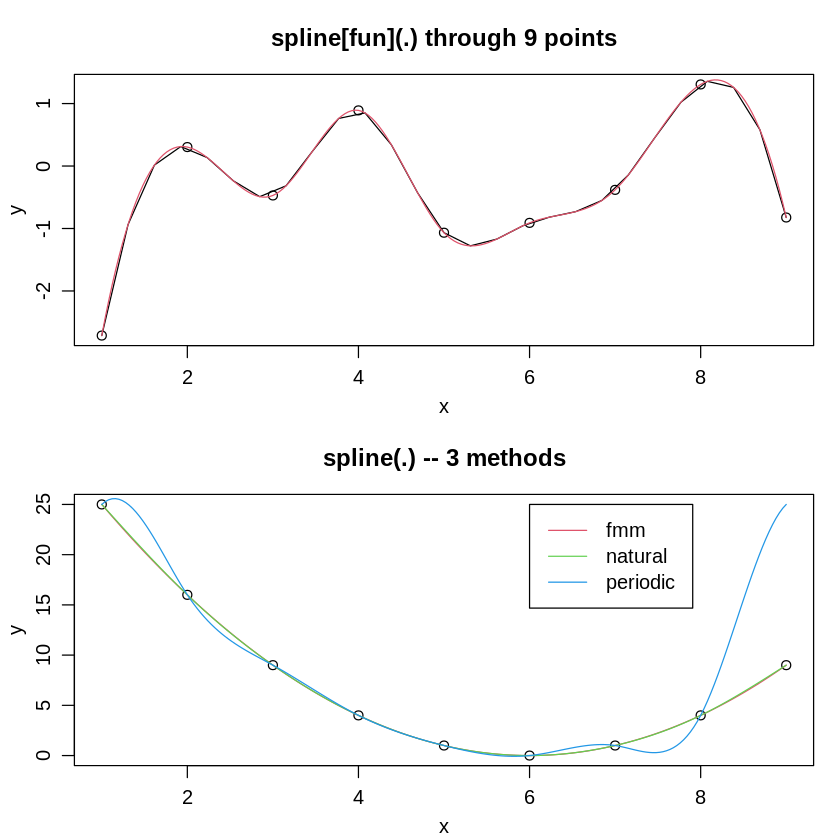

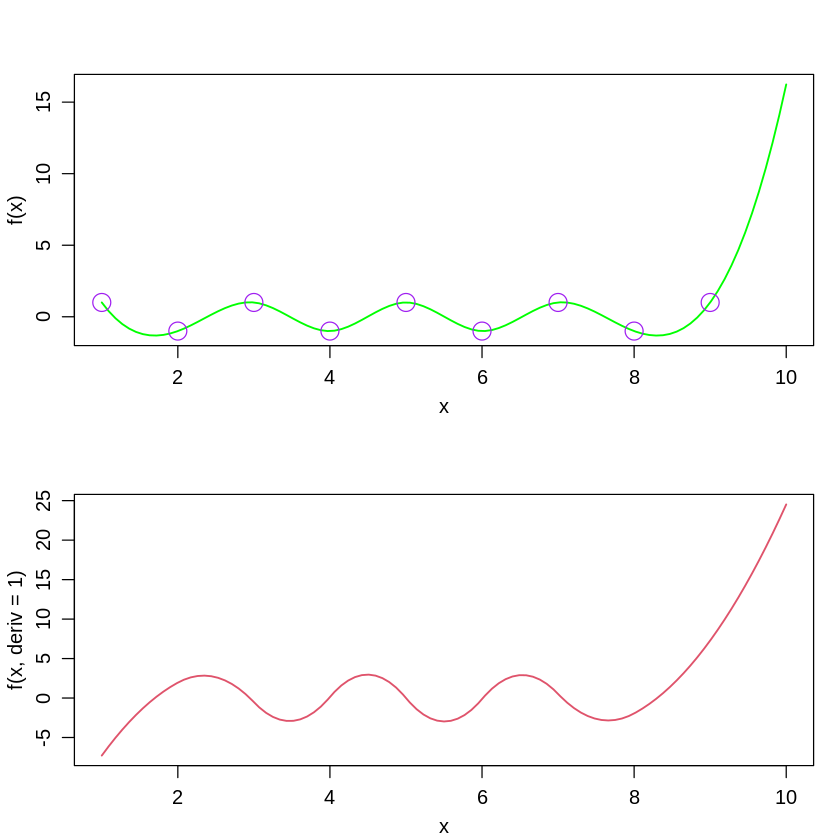

[1] 3 3 3 3 4 4 4 4 5 5 5 5 6

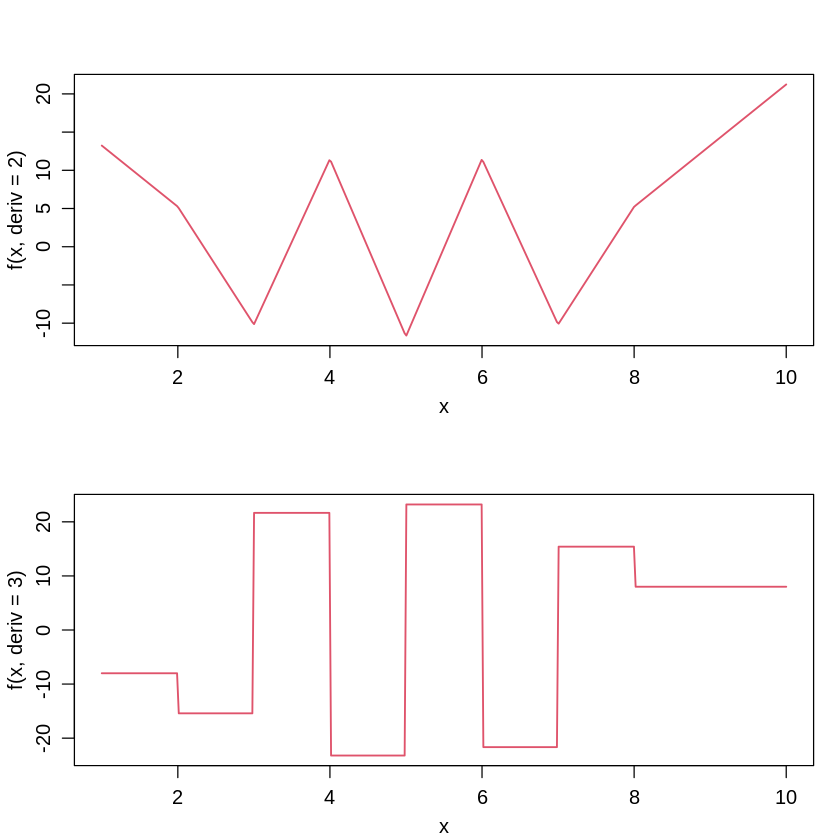

Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”


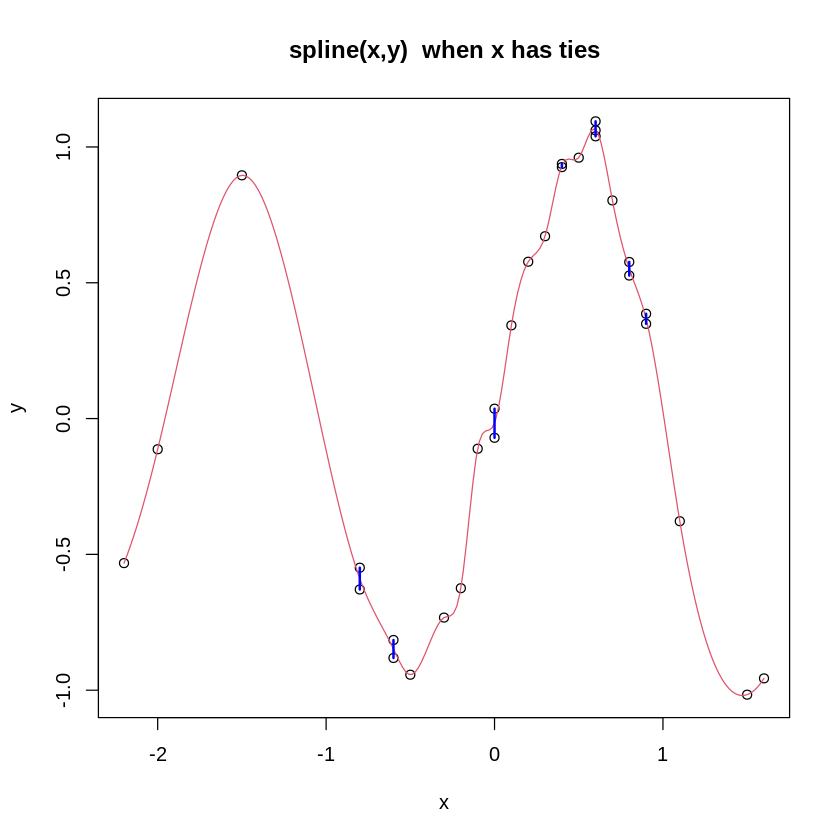

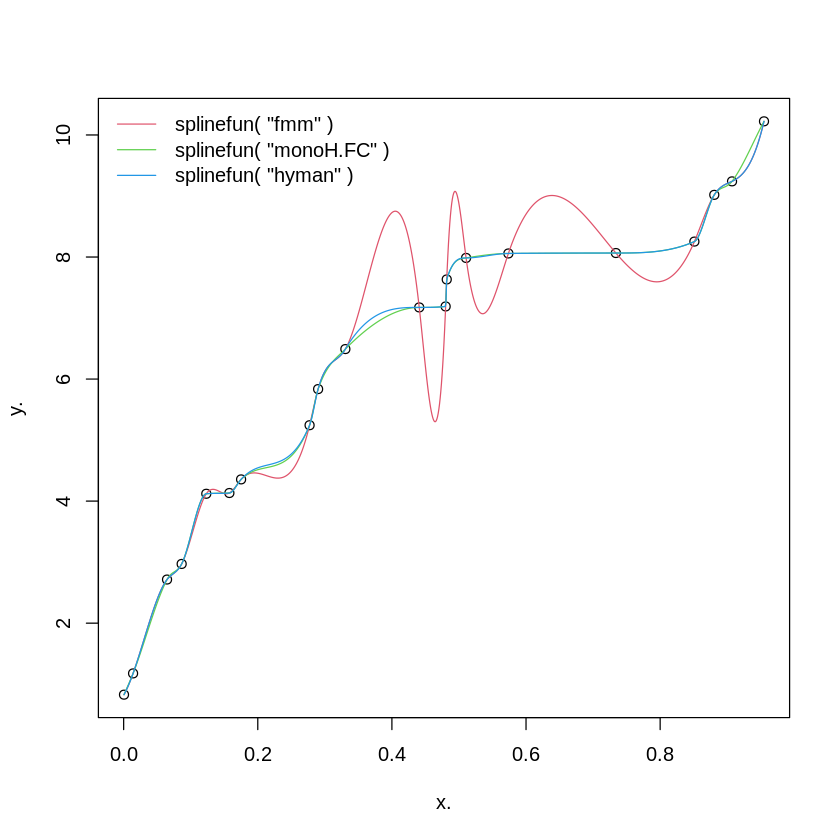

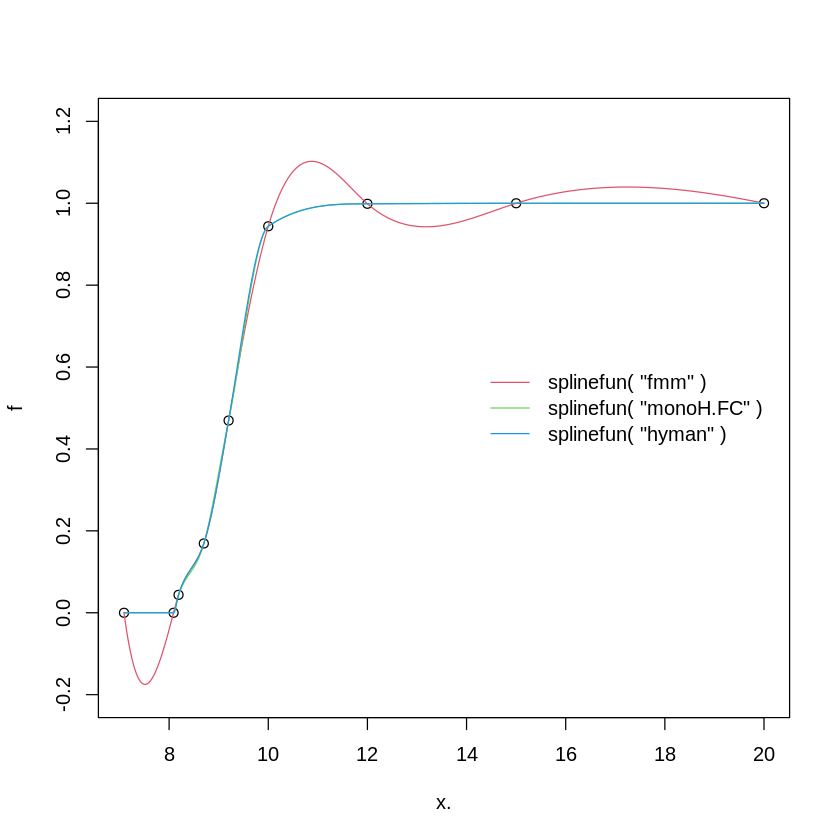

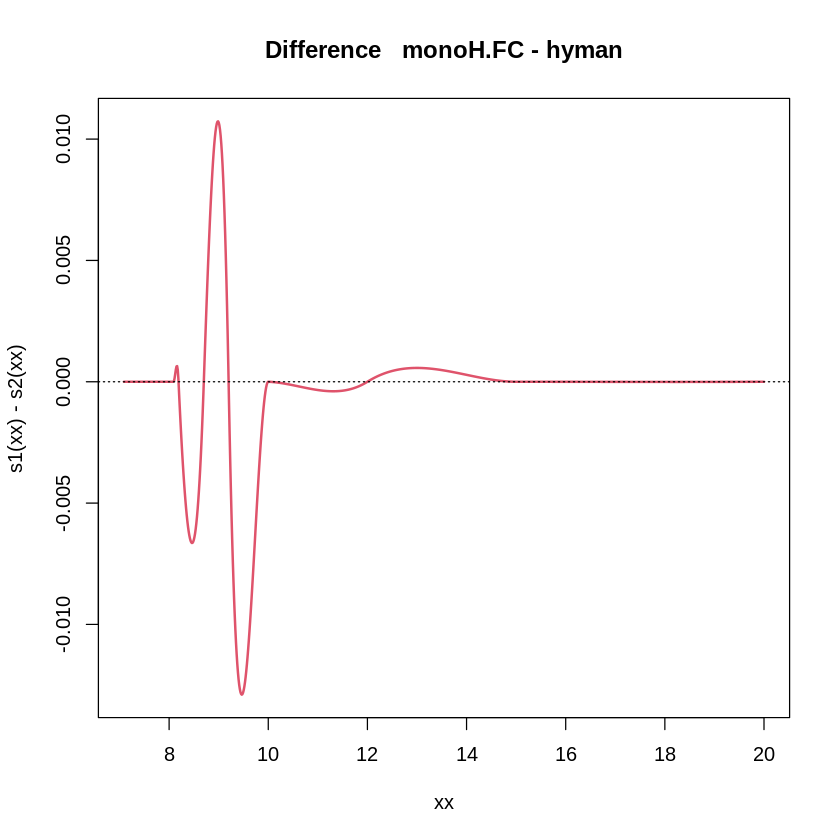

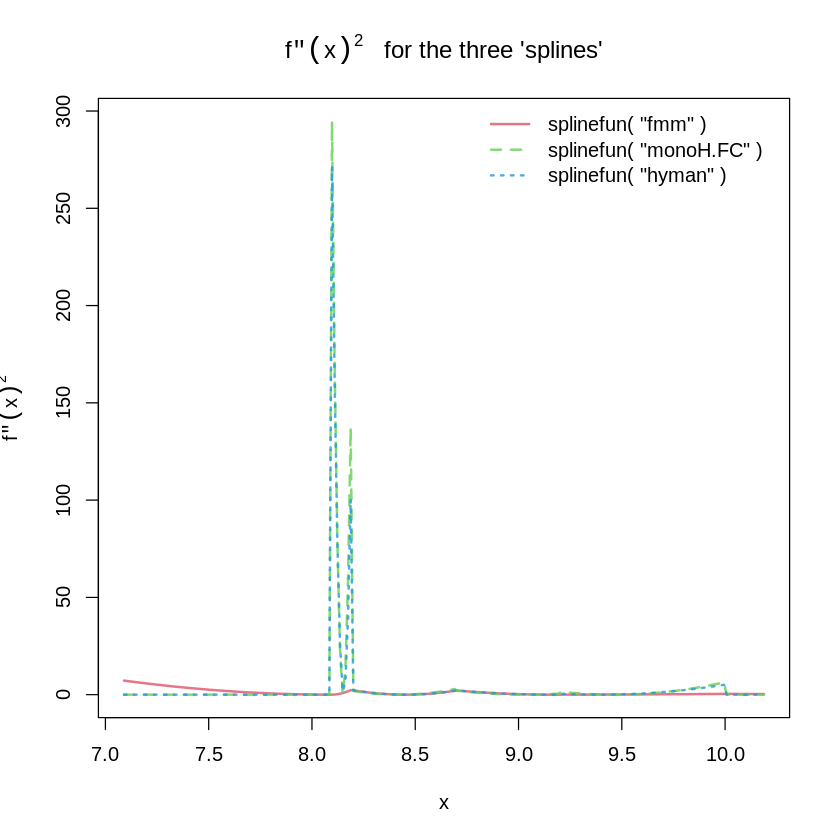

In [11]:
require(graphics)

op <- par(mfrow = c(2,1), mgp = c(2,.8,0), mar = 0.1+c(3,3,3,1))
n <- 9
x <- 1:n
y <- rnorm(n)
plot(x, y, main = paste("spline[fun](.) through", n, "points"))
lines(spline(x, y))
lines(spline(x, y, n = 201), col = 2)

y <- (x-6)^2
plot(x, y, main = "spline(.) -- 3 methods")
lines(spline(x, y, n = 201), col = 2)
lines(spline(x, y, n = 201, method = "natural"), col = 3)
lines(spline(x, y, n = 201, method = "periodic"), col = 4)
legend(6, 25, c("fmm","natural","periodic"), col = 2:4, lty = 1)

y <- sin((x-0.5)*pi)
f <- splinefun(x, y)
ls(envir = environment(f))
splinecoef <- get("z", envir = environment(f))
curve(f(x), 1, 10, col = "green", lwd = 1.5)
points(splinecoef, col = "purple", cex = 2)
curve(f(x, deriv = 1), 1, 10, col = 2, lwd = 1.5)
curve(f(x, deriv = 2), 1, 10, col = 2, lwd = 1.5, n = 401)
curve(f(x, deriv = 3), 1, 10, col = 2, lwd = 1.5, n = 401)
par(op)

## Manual spline evaluation --- demo the coefficients :
.x <- splinecoef$x
u <- seq(3, 6, by = 0.25)
(ii <- findInterval(u, .x))
dx <- u - .x[ii]
f.u <- with(splinecoef,
            y[ii] + dx*(b[ii] + dx*(c[ii] + dx* d[ii])))
stopifnot(all.equal(f(u), f.u))

## An example with ties (non-unique  x values):
set.seed(1); x <- round(rnorm(30), 1); y <- sin(pi * x) + rnorm(30)/10
plot(x, y, main = "spline(x,y)  when x has ties")
lines(spline(x, y, n = 201), col = 2)
## visualizes the non-unique ones:
tx <- table(x); mx <- as.numeric(names(tx[tx > 1]))
ry <- matrix(unlist(tapply(y, match(x, mx), range, simplify = FALSE)),
             ncol = 2, byrow = TRUE)
segments(mx, ry[, 1], mx, ry[, 2], col = "blue", lwd = 2)

## An example of monotone interpolation
n <- 20
set.seed(11)
x. <- sort(runif(n)) ; y. <- cumsum(abs(rnorm(n)))
plot(x., y.)
curve(splinefun(x., y.)(x), add = TRUE, col = 2, n = 1001)
curve(splinefun(x., y., method = "monoH.FC")(x), add = TRUE, col = 3, n = 1001)
curve(splinefun(x., y., method = "hyman")   (x), add = TRUE, col = 4, n = 1001)
legend("topleft",
       paste0("splinefun( \"", c("fmm", "monoH.FC", "hyman"), "\" )"),
       col = 2:4, lty = 1, bty = "n")

## and one from Fritsch and Carlson (1980), Dougherty et al (1989)
x. <- c(7.09, 8.09, 8.19, 8.7, 9.2, 10, 12, 15, 20)
f <- c(0, 2.76429e-5, 4.37498e-2, 0.169183, 0.469428, 0.943740,
       0.998636, 0.999919, 0.999994)
s0 <- splinefun(x., f)
s1 <- splinefun(x., f, method = "monoH.FC")
s2 <- splinefun(x., f, method = "hyman")
plot(x., f, ylim = c(-0.2, 1.2))
curve(s0(x), add = TRUE, col = 2, n = 1001) -> m0
curve(s1(x), add = TRUE, col = 3, n = 1001)
curve(s2(x), add = TRUE, col = 4, n = 1001)
legend("right",
       paste0("splinefun( \"", c("fmm", "monoH.FC", "hyman"), "\" )"),
       col = 2:4, lty = 1, bty = "n")

## they seem identical, but are not quite:
xx <- m0$x
plot(xx, s1(xx) - s2(xx), type = "l",  col = 2, lwd = 2,
     main = "Difference   monoH.FC - hyman"); abline(h = 0, lty = 3)

x <- xx[xx < 10.2] ## full range: x <- xx .. does not show enough
ccol <- adjustcolor(2:4, 0.8)
matplot(x, cbind(s0(x, deriv = 2), s1(x, deriv = 2), s2(x, deriv = 2))^2,
        lwd = 2, col = ccol, type = "l", ylab = quote({{f*second}(x)}^2),
        main = expression({{f*second}(x)}^2 ~" for the three 'splines'"))
legend("topright",
       paste0("splinefun( \"", c("fmm", "monoH.FC", "hyman"), "\" )"),
       lwd = 2, col  =  ccol, lty = 1:3, bty = "n")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: splines

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“col

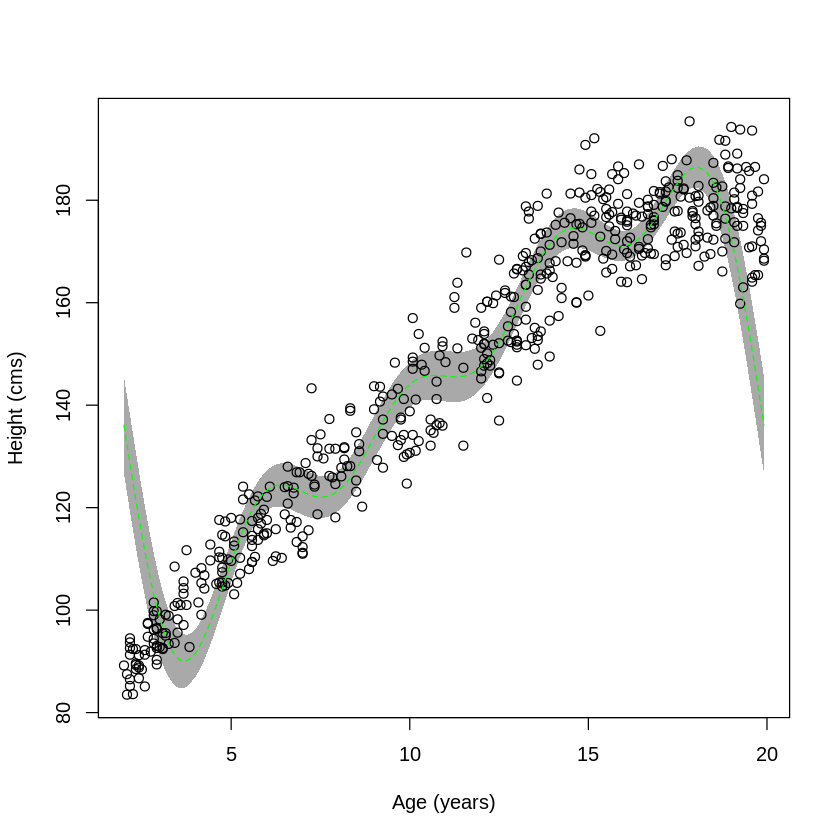

In [15]:
install.packages("Rearrangement")
library(Rearrangement) ## not in CRAN - find the tar.gz file and install it separately

data(GrowthChart)
attach(GrowthChart)

# first do Simultaneous Confidence Interval Estimation using Bootstrap
nage <- 2 * pi * (age - min(age)) / (max(age) - min(age))
nages <- unique(sort(nage))
formula <- height~I(sin(nage))+I(cos(nage))+I(sin(2*nage))+I(cos(2*nage))+I(sin(3*nage))+I(cos(3*nage))+I(sin(4*nage))+I(cos(4*nage))
j <- simconboot(nage,height,lm,formula)
plot(j, border=NA, col='darkgray',xlab = 'Age (years)',ylab = 'Height (cms)',xaxt = "n")
axis(1, at = seq(-2*pi*min(age)/(max(age)-min(age)), 2*pi+1, by=5*2*pi/(max(age)-min(age))), label = seq(0, max(age)+1, by=5))
points(nage,height)
lines(nages, j$cef, lty=2, col='green')

#now do Local Linear Regression Methods for Conditional Mean Functions
ages <- unique(sort(age))
lplm.fit1 <- lplm(age,height,h=1,xx=ages)

# exercise - plot the fits, evaluate it.

detach(GrowthChart)

# and
# http://archive.ics.uci.edu/ml/datasets/Student+Performance
# http://archive.ics.uci.edu/ml/datasets/NoisyOffice
# http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset
